In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay


In [19]:
df = pd.read_csv("heart_dataset.csv")  # Load the dataset

print("Shape:", df.shape)  # Print the shape of the data
df.head()


Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
print(df.isna().sum()) # Shows the number of missing values in each column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [21]:
df = df.drop_duplicates().reset_index(drop=True) # Remove duplicate rows and reset indexes

In [22]:
# Separate features (X) and the target variable (y)
y = df['target']
X = df.drop(columns=['target'])

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (302, 13)
y shape: (302,)


In [23]:
# Separate data into training and test samples, keeping class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [38]:
# Create a pipeline for preprocessing and training
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Fill missing values with mean
    ("scaler", StandardScaler()),                 # Standardize features
    ("clf", LogisticRegression(max_iter=200))    # Logistic Regression model
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict class labels for the test set
y_pred = pipe.predict(X_test)

# Get predicted probabilities for class 1 (used for ROC-AUC)
y_proba = pipe.predict_proba(X_test)[:,1]

Accuracy: 0.803
F1: 0.824
ROC-AUC: 0.871


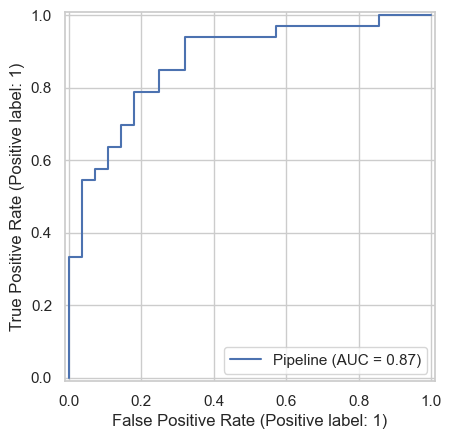

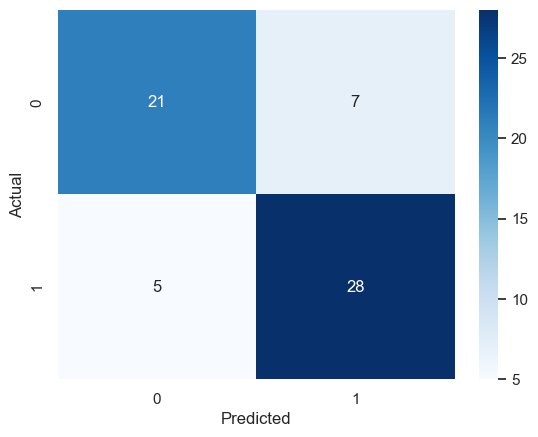

In [25]:
# Print evaluation metrics: Accuracy, F1-score, ROC-AUC
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1:", round(f1_score(y_test, y_pred),3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba),3))

# Plot ROC curve using the pipeline and test data
RocCurveDisplay.from_estimator(pipe, X_test, y_test)
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
# Create a pipeline for Random Forest with missing value imputation
pipe_rf = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Fill missing values with mean
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest model
])

# Fit the Random Forest pipeline on the training data
pipe_rf.fit(X_train, y_train)

# Predict class labels for the test set
y_pred_rf = pipe_rf.predict(X_test)

# Get predicted probabilities for class 1 (used for ROC-AUC)
y_proba_rf = pipe_rf.predict_proba(X_test)[:,1]

Random Forest Metrics:
Accuracy: 0.754
F1: 0.776
ROC-AUC: 0.861


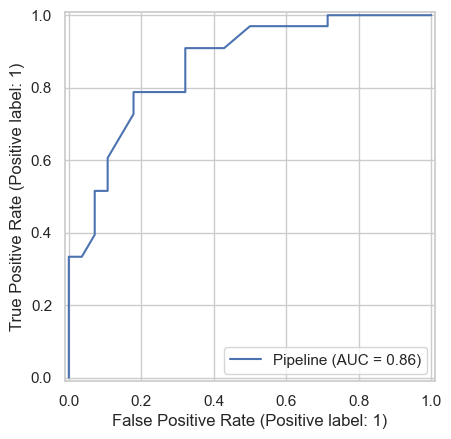

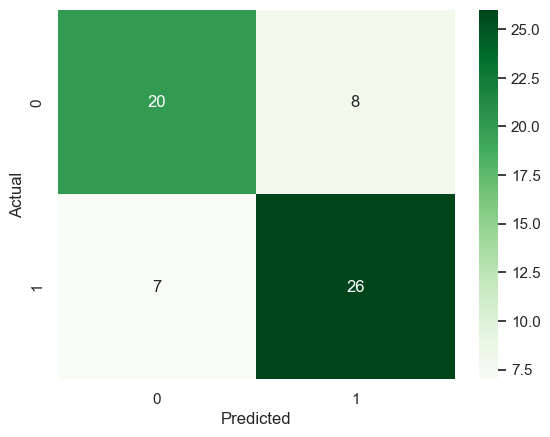

In [27]:
# Print evaluation metrics for the Random Forest model
print("Random Forest Metrics:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf),3))  # Overall accuracy
print("F1:", round(f1_score(y_test, y_pred_rf),3))              # F1-score (balance of precision & recall)
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_rf),3))   # Area under the ROC curve

# Plot ROC curve for Random Forest
RocCurveDisplay.from_estimator(pipe_rf, X_test, y_test)
plt.show()

# Plot confusion matrix as a heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

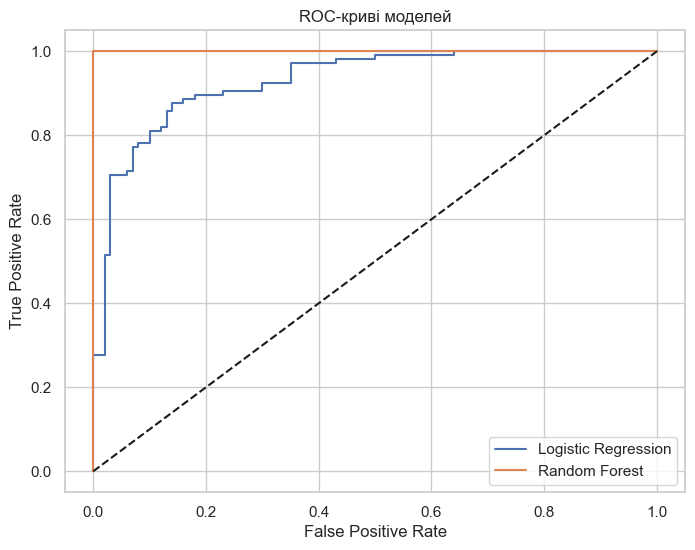

In [37]:
# ROC Curves for Logistic Regression and Random Forest

# Compute False Positive Rate (fpr) and True Positive Rate (tpr) for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:,1])

# Compute fpr and tpr for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

# Plot both ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")  # ROC for Logistic Regression
plt.plot(fpr_rf, tpr_rf, label="Random Forest")          # ROC for Random Forest
plt.plot([0,1], [0,1], 'k--')                           # Diagonal reference line (random guess)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of Models")
plt.legend()
plt.show()

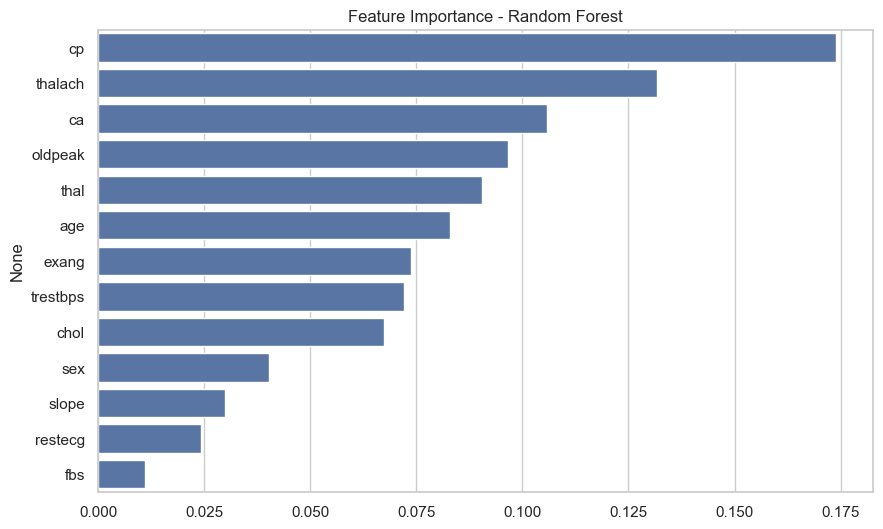

In [28]:
# Extract trained Random Forest model from pipe
rf_model = pipe_rf.named_steps['clf']

# Get feature importance scores from the model
importances = rf_model.feature_importances_
features = X.columns

# Create a sorted Series of feature importances
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot feature importances as a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.show()